In [14]:
import sys

print(sys.version)

3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]


'\nコードを提供する時に、自身とversionが違うと気になるので入れています。\n'

In [15]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
# パッケージのインポート
import pandas as pd
import numpy as np
from pycaret.regression import *

# データの読み込み
concrete_data = pd.read_excel(r'concrete.xlsx')

'''
# 分類の時は下記を使用する
from pycaret.classification import *
'''

'\n# 分類の時は下記を使用する\nfrom pycaret.classification import *\n'

In [17]:
# データの読み込み
# 第一引数でデータを読み込む
# 第二引数で目的変数を指定する
exp1 = setup(concrete_data, target = 'Concrete compressive strength', ignore_features = None, session_id=123)

'''
第一引数：解析に用いる data（読み込んだデータ）
第二引数（=target）：予測に用いる目的変数の名称
第三引数（=ignore_features）：分析から外す説明変数の名称
第四引数（=session_id）：訓練データと予測データを分割する乱数

→実行するとデータの型が表示される。
　間違いがなければ「Enter」を押して承認する。
'''

,Description,Value
0,session_id,123
1,Target,Concrete compressive strength
2,Original Data,"(1030, 9)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(720, 21)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='Concrete compressive strength',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=N...
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='Concrete compressive strength')),
       

'\n第一引数：解析に用いる data（読み込んだデータ）\n第二引数（=target）：予測に用いる目的変数の名称\n第三引数（=ignore_features）：分析から外す説明変数の名称\n第四引数（=session_id）：訓練データと予測データを分割する乱数\n\n→実行するとデータの型が表示される。\n\u3000間違いがなければ「Enter」を押して承認する。\n'

In [18]:
# モデルを比較する
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.4189,25.7839,5.0231,0.9077,0.1623,0.1205,0.701
lightgbm,Light Gradient Boosting Machine,3.5269,26.4037,5.0713,0.9052,0.1703,0.1295,0.271
rf,Random Forest Regressor,3.8431,30.5352,5.4490,0.8904,0.1754,0.1365,0.842
gbr,Gradient Boosting Regressor,4.5127,36.5450,6.0231,0.8685,0.1875,0.1543,0.237
dt,Decision Tree Regressor,4.6607,49.2245,6.9360,0.8218,0.2200,0.1575,0.040
lr,Linear Regression,5.5538,51.4880,7.1611,0.8129,0.2474,0.1920,0.282
br,Bayesian Ridge,5.5642,51.8473,7.1831,0.8119,0.2417,0.1928,0.012
ridge,Ridge Regression,5.5835,52.5081,7.2246,0.8099,0.2425,0.1948,0.013
ada,AdaBoost Regressor,7.4582,82.0182,9.0237,0.7058,0.3321,0.3232,0.257
lar,Least Angle Regression,7.1762,97.8184,9.5421,0.6442,0.3517,0.2747,0.020


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [19]:
# モデルを指定する
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.6801,29.0429,5.3891,0.8834,0.1544,0.1133
1,3.6404,24.7465,4.9746,0.9271,0.1333,0.1048
2,3.7176,27.1525,5.2108,0.8912,0.1742,0.1314
3,3.9124,29.4265,5.4246,0.9161,0.1921,0.1541
4,3.4453,23.8866,4.8874,0.9210,0.1715,0.1404
5,4.4085,47.5465,6.8954,0.8452,0.2169,0.1627
6,3.5382,25.8410,5.0834,0.9026,0.1509,0.1135
7,4.2253,34.6448,5.8860,0.8663,0.2391,0.1901
8,2.7980,13.8702,3.7243,0.9337,0.1130,0.0885


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [21]:
# モデルの最適化
tuned_rf = tune_model(rf, n_iter = 100, optimize = 'R2') 

'''
第一引数：最適化を実施するモデル
第二引数：ランダムグリッド検索の実施回数
第三引数：最適化の指標

詳細は公式HP
https://pycaret.org/tune-model/
'''

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.3594,36.2690,6.0224,0.8543,0.1790,0.1365
1,4.4401,34.5935,5.8816,0.8981,0.1491,0.1211
2,4.6355,38.2921,6.1881,0.8466,0.1940,0.1585
3,4.7033,40.6656,6.3770,0.8841,0.2151,0.1839
4,4.1735,32.0896,5.6648,0.8938,0.1952,0.1686
5,5.3034,61.3210,7.8308,0.8004,0.2452,0.1974
6,4.1399,33.0872,5.7521,0.8752,0.1701,0.1346
7,4.7190,46.9478,6.8518,0.8188,0.2805,0.2346
8,3.6334,23.1011,4.8064,0.8895,0.1374,0.1110


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=11, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.02,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


'\n第一引数：最適化を実施するモデル\n第二引数：ランダムグリッド検索の実施回数\n第三引数：最適化の指標\n\n詳細は公式HP\nhttps://pycaret.org/tune-model/\n'

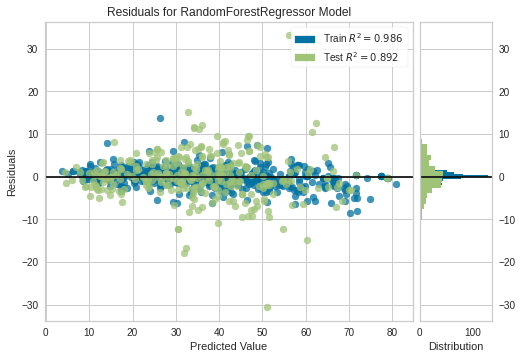

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [22]:
# モデルのプロット
plot_model(rf)

In [23]:
# モデルの評価
evaluate_model(rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…